Problem Statement:

Implement the Image classification CNN model for classifying hand-written MNIST dataset by dividing the model into following 4 stages:

a.	Loading and preprocessing the image data

b.	Defining the model's architecture

c.	Training the model

d.	Estimating the model's performance

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD

In [6]:
# Load the training and testing data 

train = pd.read_csv('./mnist_train.csv')
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x_train = train.drop(['label'], axis=1).values
y_train = train['label'].values
x_train.shape

(60000, 784)

In [10]:
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32')/255

In [12]:
test = pd.read_csv('./mnist_test.csv')
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# b. Defining the model's architecture


model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1)

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 609,482 (2.32 MB)

 Trainable params: 609,418 (2.32 MB)

 Non-trainable params: 64 (256.00 B)

In [16]:
# c.Training the model
r = model.fit(x_train, y_train, validation_split=0.2, epochs=11, batch_size = 64)


Epoch 1/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.6841 - loss: 0.9616 - val_accuracy: 0.9544 - val_loss: 0.1396
Epoch 2/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.9510 - loss: 0.1512 - val_accuracy: 0.9834 - val_loss: 0.0599
Epoch 3/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9698 - loss: 0.0950 - val_accuracy: 0.9832 - val_loss: 0.0573
Epoch 4/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9768 - loss: 0.0752 - val_accuracy: 0.9871 - val_loss: 0.0458
Epoch 5/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9797 - loss: 0.0614 - val_accuracy: 0.9808 - val_loss: 0.0657
Epoch 6/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9837 - loss: 0.0509 - val_accuracy: 0.9855 - val_loss: 0.0580
Epoch 7/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9869 - loss: 0.0382 - val_accuracy: 0.9882 - val_loss: 0.0473
Epoch 8/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9887 - loss: 0.0346 - 

In [20]:
x_test = test.drop(['label'], axis = 1).values
y_test = test['label'].values
x_test.shape

(10000, 784)

In [22]:
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32')/255

In [24]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [26]:
predictions

array([[2.5310143e-21, 3.8292940e-14, 2.6593920e-12, ..., 1.0000000e+00,
        6.1185867e-18, 1.8814700e-15],
       [8.7247152e-09, 3.7898200e-09, 1.0000000e+00, ..., 2.8036498e-11,
        2.6550222e-09, 2.8518722e-11],
       [7.2505085e-10, 9.9999762e-01, 4.6464322e-08, ..., 1.3756563e-06,
        2.0585480e-09, 4.7898446e-10],
       ...,
       [5.2831396e-22, 1.0529313e-16, 1.5338933e-18, ..., 4.7633433e-14,
        8.9250104e-16, 2.1010204e-13],
       [3.9089668e-16, 5.0352950e-19, 1.5463772e-19, ..., 1.3303677e-12,
        2.7910181e-09, 1.7936112e-10],
       [2.8942120e-09, 9.0831876e-14, 1.1215857e-09, ..., 1.1093979e-14,
        3.9488701e-09, 1.0713395e-13]], dtype=float32)

In [28]:
r.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [30]:
# Estimating the model's performance
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss : {test_loss: .4f}')
print(f'Test Accuracy : {test_accuracy: .4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9857 - loss: 0.0561
Test Loss :  0.0437
Test Accuracy :  0.9894


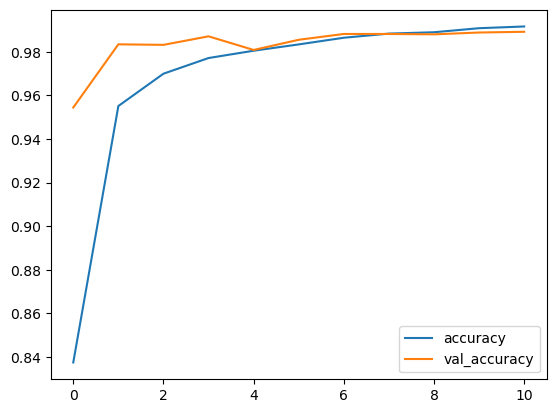

In [32]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

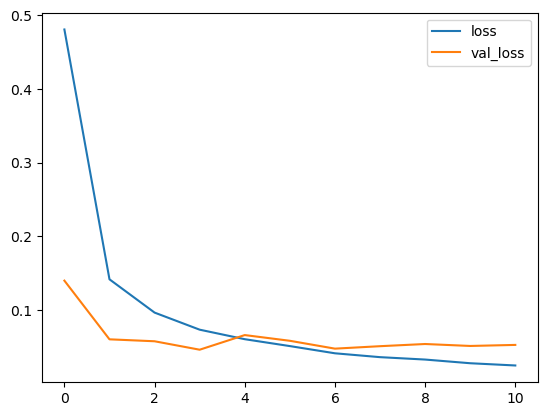

In [34]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

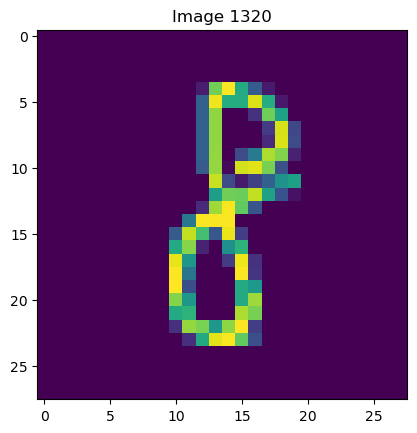

In [50]:
# Showing an image at a specific position and predicting its class
# Choose a random index or specify the index of the image you want to display
image_index = 1320  # You can change this to any index from 0 to 9999 for the test set

# Show the image
plt.imshow(x_test[image_index].reshape(28, 28))
plt.title(f"Image {image_index}")
plt.show()

In [52]:

# Predict the class of the selected image
image = x_test[image_index].reshape(1, 28, 28, 1)  # Reshape the image for the model
predicted_class = model.predict(image)
predicted_label = np.argmax(predicted_class)  # Get the index with the highest probability

# Output the prediction
print(f"Predicted label: {predicted_label}")
print(f"True label: {y_test[image_index]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted label: 8
True label: 8
